In [23]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
## Models
from sklearn.linear_model import LinearRegression, SGDRegressor

## Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('boston.csv')

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df.shape

(506, 14)

In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
corr = df.corr()
corr.shape

(14, 14)

<Axes: >

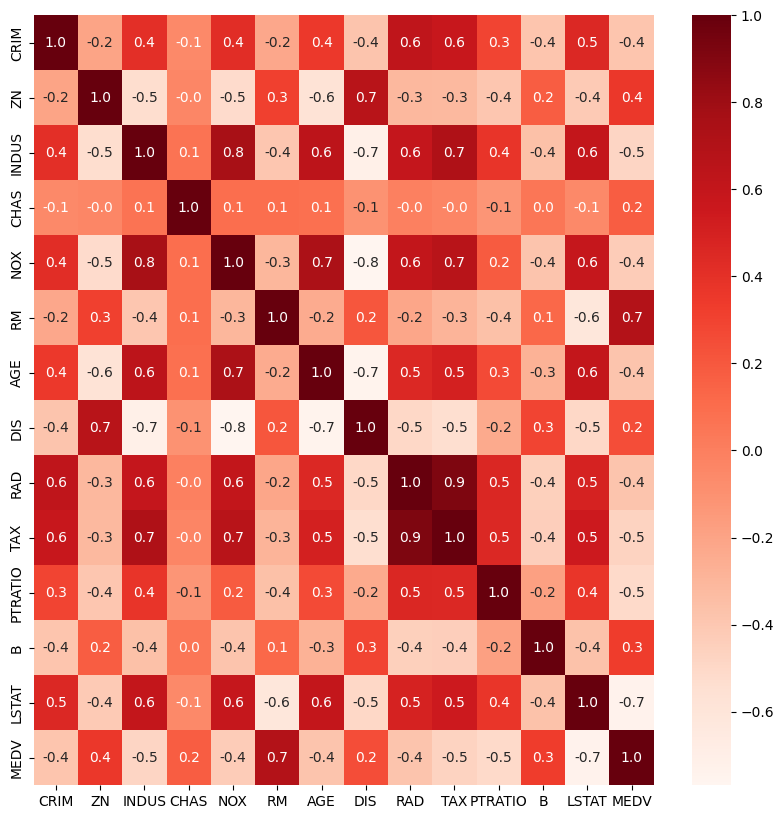

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr ,fmt='.1f', annot=True, cmap='Reds')

In [17]:
df['MEDV'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

In [18]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [27]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lm.predict(X_train)

In [32]:
## prdiction
y_pred_train_lin = lm.predict(X_train)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_train_lin = (mean_squared_error(y_train , y_pred_train_lin))**0.5  ## route

## R2 score
r2_train_lin = r2_score(y_train, y_pred_train_lin)


print(f'RMSE for training set using LinearRegrssion {rmse_train_lin :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_train_lin :.3f}')

RMSE for training set using LinearRegrssion 4.748
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.743


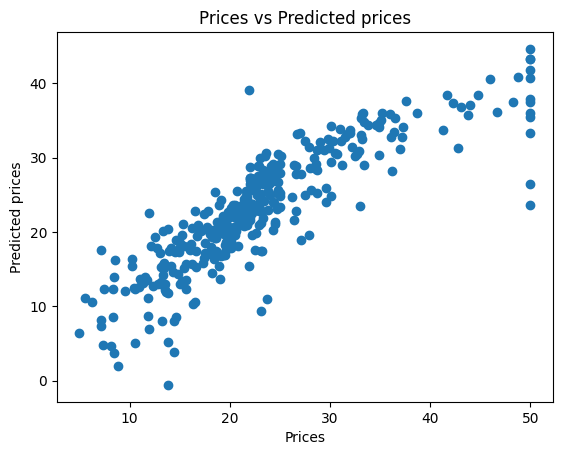

In [33]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

<ipython-input-35-3959bf587b5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


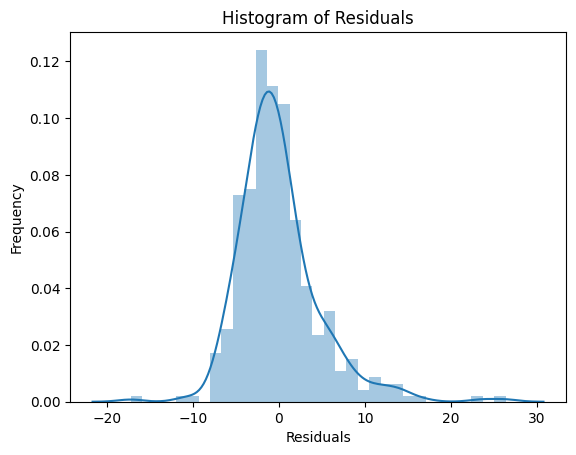

In [35]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [38]:
## prdiction
y_pred_test_lin = lm.predict(X_test)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_test_lin = (mean_squared_error(y_test , y_pred_test_lin))**0.5  ## route

## R2 score
r2_test_lin = r2_score(y_test, y_pred_test_lin)


print(f'RMSE for training set using LinearRegrssion {rmse_test_lin :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_test_lin :.3f}')

RMSE for training set using LinearRegrssion 4.639
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.711


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Train the model using the training sets 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
## prdiction
y_pred_train_rf = rf.predict(X_train)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_test_rf = (mean_squared_error(y_train , y_pred_train_rf))**0.5  ## route

## R2 score
r2_test_rf = r2_score(y_train, y_pred_train_rf)


print(f'RMSE for training set using LinearRegrssion {rmse_test_rf :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_test_rf :.3f}')

RMSE for training set using LinearRegrssion 1.434
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.977


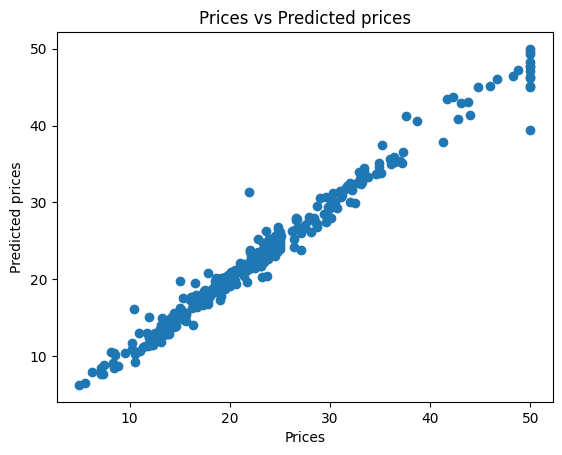

In [57]:
plt.scatter(y_train, y_pred_train_rf)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [58]:
## prdiction
y_pred_test_rf = rf.predict(X_test)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_test_rf = (mean_squared_error(y_test , y_pred_test_rf))**0.5  ## route

## R2 score
r2_test_rf = r2_score(y_test, y_pred_test_rf)


print(f'RMSE for training set using LinearRegrssion {rmse_test_rf :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_test_rf :.3f}')

RMSE for training set using LinearRegrssion 3.124
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.869


In [59]:
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
## prdiction
y_pred_train_reg = reg.predict(X_train)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_test_reg = (mean_squared_error(y_train , y_pred_train_reg))**0.5  ## route

## R2 score
r2_test_reg = r2_score(y_train, y_pred_train_reg)


print(f'RMSE for training set using LinearRegrssion {rmse_test_reg :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_test_reg :.3f}')

RMSE for training set using LinearRegrssion 0.014
****************************************************************************************************
R2 score for training set using LinearRegrssion 1.000


In [61]:
## prdiction
y_pred_test_reg = reg.predict(X_test)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_test_reg = (mean_squared_error(y_test , y_pred_test_reg))**0.5  ## route

## R2 score
r2_test_reg = r2_score(y_test, y_pred_test_reg)


print(f'RMSE for training set using LinearRegrssion {rmse_test_reg :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_test_reg :.3f}')

RMSE for training set using LinearRegrssion 3.040
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.876


In [62]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn import svm

# Create a SVM Regressor
sv = svm.SVR()

sv.fit(X_train, y_train)

SVR()

In [66]:
## prdiction
y_pred_train_sv = sv.predict(X_train)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_test_sv = (mean_squared_error(y_train , y_pred_train_sv))**0.5  ## route

## R2 score
r2_test_sv = r2_score(y_train, y_pred_train_sv)


print(f'RMSE for training set using LinearRegrssion {rmse_test_sv :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_test_sv :.3f}')

RMSE for training set using LinearRegrssion 5.476
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.659


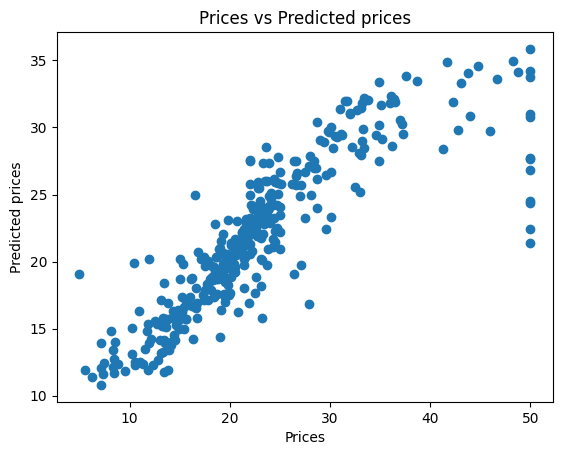

In [67]:
plt.scatter(y_train, y_pred_train_sv)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [68]:
## prdiction
y_pred_test_sv = sv.predict(X_test)

## RMSE
## RMSE train data to test RMSE bettwen train and valid
rmse_test_sv = (mean_squared_error(y_test , y_pred_test_sv))**0.5  ## route

## R2 score
r2_test_sv = r2_score(y_test, y_pred_test_sv)


print(f'RMSE for training set using LinearRegrssion {rmse_test_sv :.3f}')
print("**" * 50)
print(f'R2 score for training set using LinearRegrssion {r2_test_sv :.3f}')

RMSE for training set using LinearRegrssion 5.095
****************************************************************************************************
R2 score for training set using LinearRegrssion 0.652


In [69]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [r2_test_lin*100, r2_test_rf*100, r2_test_reg*100, r2_test_sv*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,87.600954
1,Random Forest,86.901066
0,Linear Regression,71.122601
3,Support Vector Machines,65.164299
